# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,309,38928341,0.8
Albania,7325,2877800,254.5
Algeria,1692,43851043,3.9
Andorra,557,77265,720.9
Angola,709,32866268,2.2
Antigua and Barbuda,221,97928,225.7
Argentina,100217,45195777,221.7
Armenia,11155,2963234,376.4
Australia,137,25459700,0.5


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Estonia,19508,1326539,1470.6
San Marino,422,33938,1243.4
Czechia,129637,10708982,1210.5
Hungary,114175,9660350,1181.9
Jordan,114139,10203140,1118.7
Montenegro,6962,628062,1108.5
Poland,305397,37846605,806.9
Serbia,68604,8737370,785.2
Seychelles,750,98340,762.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/21/21    2670001.0
3/22/21    2678262.0
3/23/21    2699231.0
3/24/21    2722988.0
3/25/21    2744608.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/12/21        NaN
3/13/21    10568.0
3/14/21     8978.0
3/15/21     6543.0
3/16/21    17679.0
3/17/21     7705.0
3/18/21    28489.0
3/19/21    15476.0
3/20/21    14499.0
3/21/21      768.0
3/22/21     8261.0
3/23/21    20969.0
3/24/21    23757.0
3/25/21    21620.0
Name: Germany, dtype: float64

<AxesSubplot:>

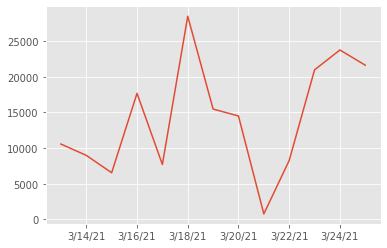

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

221.17841311960186